(solving-ivps-using-irk-methods-section)=
# Solving initial value problems using implicit Runge-Kutta methods

Recall that the {prf:ref}`general form of a Runge-Kutta method<rk-definition>` is

$$ \begin{align*}
   y_{n+1} &= y_n + h \sum_{i=1}^s b_i k_i,\\
   k_i &= f(t_n +c_i h,y_n + h \sum_{j=1}^s a_{ij} k_j).
\end{align*} $$

To simplify the calculations for implicit methods we let the summation in the stage values $k_i$ be denoted by $Y_i$, i.e.,

$$Y_i = y_n +h \displaystyle\sum_{j=1}^s a_{ij} k_j$$

then we can write an implicit Runge-Kutta method as

$$ \begin{align*}
   y_{n+1} &= y_n + h \sum_{i=1}^s b_i f(t_n + c_i h, Y_i),\\
   Y_i &= y_n + h \sum_{j=1}^s a_{ij} f(t_n + c_j h, Y_j).
\end{align*} $$

Expanding the summations in $Y_i$

$$ \begin{align*}
    Y_1 &= y_n + h(a_{11} f(t_n + c_1 h, Y_1) + a_{12} f(t_n + c_2 h, Y_2) + \cdots + a_{1s} f(t_n + c_s h, Y_s)), \\
    Y_2 &= y_n + h(a_{21} f(t_n + c_1 h, Y_1) + a_{22} f(t_n + c_2 h, Y_2) + \cdots + a_{2s} f(t_n + c_s h, Y_s)), \\
    & \vdots \\
    Y_s &= y_n + h(a_{s1} f(t_n + c_1 h, Y_1) + a_{s2} f(t_n + c_2 h, Y_2) + \cdots + a_{ss} f(t_n + c_s h, Y_s)), \\
\end{align*} $$

These expressions for $Y_i$ are still implicit functions but now the ODE function $f(t,y)$ is calculated using a single value as opposed to a summation of $s$ values.

## Solving $Y_i$

The values of $Y_i$ are found by solving this system of equations. In practice the solution of this system of equations is done using <a href="https://en.wikipedia.org/wiki/Newton%27s_method" target="_blank">Newton's method</a> with the derivatives approximated using <a href="https://en.wikipedia.org/wiki/Finite_difference" target="_blank">finite-difference approximations</a>. This is outside the scope of these notes so we shall be solving these systems either using iterative methods.

The idea behind an iterative method to solve a system of equations is that we start with a guess of the solution and use this guess value to compute an improved guess value. We continue to do this until the difference between two successive guess values is sufficiently small and we are satisfied that our guess is close enough to the solution of the linear system. 

Let $Y_i^{(k)}$ denote the $k$-th guess value for $Y_i$ then the iterative equations are

$$ \begin{align*}
    Y_i^{(k+1)} &= y_n + h\sum_{j=1}^s a_{ij} f(t_n + c_i, Y_j^{(k)}).
\end{align*} $$

If $tol$ is an tolerance for the desired accuracy then we cease iterations when 

$$ \max_i( |Y_i^{(k+1)} - Y_i^{(k)}|) < tol.$$

This iterative method is a form of the Gauss-Seidel method which we will be using to solve systems of linear equations in [Chapter 7](gauss-seidel-method-section).

::::{prf:example}
:label: radauIA-example

The third-order Radau IA implicit Runge-Kutta method is defined by the following Butcher tableau

\begin{align*}
   \begin{array}{c|cc}
      0 & 1/4 & -1/4 \\
      2/3 & 1/4 & 5/12 \\ \hline
      & 1/4 & 3/4
    \end{array}
\end{align*}

Use this method to calculate the solution of the following initial value problem using a step length of $h=0.2$ and a convergence tolerance of $tol=10^{-4}$.

\begin{align*}
    y' = ty, \qquad t\in [0,1], \qquad y(0)=1.
\end{align*}
 
:::{dropdown} Solution

The $Y_i$ values for this method are

$$ \begin{align*}
    Y_1 &= y_n + h(\tfrac{1}{4}f(t_n + 0h, Y_1) - \tfrac{1}{4}f(t_n + \tfrac{2}{3}h, Y_2))m \\
    Y_2 &= y_n + h(\tfrac{1}{4}f(t_n + 0h, Y_1) + \tfrac{5}{12}f(t_n + \tfrac{2}{3}h, Y_2)).
\end{align*} $$

Since $f(t,y) = ty$ then

$$ \begin{align*}
    Y_1 &= y_n + h(\tfrac{1}{4}t_nY_1 - \tfrac{1}{4}(t_n+\tfrac{2}{3}h)Y_2), \\
    Y_2 &= y_n + h(\tfrac{1}{4}t_nY_1 + \tfrac{5}{12}(t_n+\tfrac{2}{3}h)Y_2).
\end{align*} $$

so the iterative equations are

$$ \begin{align*}
    Y_1^{(k+1)} &= y_n + h(\tfrac{1}{4}t_nY_1^{(k)} - \tfrac{1}{4}(t_n+\tfrac{2}{3}h)Y_2^{(k)}), \\
    Y_2^{(k+1)} &= y_n + h(\tfrac{1}{4}t_nY_1^{(k)} + \tfrac{5}{12}(t_n+\tfrac{2}{3}h)Y_2^{(k)}).
\end{align*} $$

Using starting guess values of $Y_1^{(0)} = Y_2^{(0)} = 1$ (these are arbitrary but must be non-zero) then 

$$ \begin{align*}
    Y_1^{(1)} &= 1 + 0.2(\tfrac{1}{4}(0)(1) - \tfrac{1}{4}(0+\tfrac{2}{3}(0.2))(1)) \\
    &= 0.993333, \\
    Y_2^{(1)} &= 1 + 0.2(\tfrac{1}{4}(0)(1) + \tfrac{5}{12}(0+\tfrac{2}{3}(0.2))(1)) \\
    &= 1.011111.
\end{align*} $$

The maximum difference between $Y_i^{(1)}$ and $Y_i^{(0)}$ is

$$ \begin{align*}
    \max(| Y_1^{(1)} - Y_1^{(0)}|, |Y_2^{(1)} - Y_2^{(0)}|) 
    &= \max(| 0.003333 - 1|, |1.011111 - 1|) \\
    &= 0.01111,
\end{align*} $$

since $0.01111 > 10^{-4}$ the guess values $Y_i^{(1)}$ do not satisfy the accuracy requirement. Repeating the calculations we have the values given in the table below. 

| $k$ | $Y_1^{(k)}$ | $Y_2^{(2)}$ | Max Difference |
|:---:|:-----------:|:-----------:|:--------------:|
|  0  |   1         |   1         |       -        |
|  1  |   0.993333  |   1.011111  |     1.11e-2    |
|  2  |   0.993259  |   1.011235  |     1.23e-4    |
|  3  |   0.993258  |   1.011236  |     1.37e-6    |

It took 3 iterations to reached the desired accuracy where $Y_1 = 0.993258$ and $Y_2 = 1.011236$. Using these values we can calculate the solution over the first step

$$ \begin{align*}
    y_1 &= y_0 + h(\tfrac{1}{4}f(t_0, Y_1) + \tfrac{3}{4}f(t_0 + \tfrac{2}{3}h, Y_2) \\
    &= 1 + 0.2(\tfrac{1}{4}(0)(0.993258) + \tfrac{3}{4}(0 + \tfrac{2}{3}(0.2), 1.011236)) \\
    &= 1.020225.
\end{align*} $$

The solution to this initial value problem using the Radau IA method is shown in the table below along with the values of $Y_1$ and $Y_2$ and the number of iterations required to achieve the desired accuracy. 

| $n$ | $t_n$ |  $y_n$   |  $Y_1$   |  $Y_2$   |   Iterations   |
|:---:|:-----:|:--------:|:--------:|:--------:|:--------------:|
|  0  |  0.0  | 1.000000 |    -     |     -    |        -       |
|  1  |  0.2  | 1.020225 | 0.993258 | 1.011236 |        3       |
|  2  |  0.4  | 1.083341 | 1.012690 | 1.059789 |        3       |
|  3  |  0.6  | 1.197317 | 1.073989 | 1.156207 |        4       |
|  4  |  0.8  | 1.377300 | 1.184716 | 1.313100 |        4       |
|  5  |  1.0  | 1.649006 | 1.359225 | 1.552411 |        5       |

:::
::::

## Code

The code below defines a function called `radauIA()` which computes the solution to an initial value problem using the Radau IA method. The stage values are contained in `Y1` and `Y2` and the previous values are contained in `Y1old` and `Y2old`. Iterations continue until the maximum difference between the new and previous values are less than $10^{-4}$ or when 10 iterations have been completed, whichever comes first. 

:::::{tab-set}
::::{tab-item} Python
```python
def radauIA(f, t, y, h): 

    # Calculate stage values
    Y1, Y2 = np.ones(len(y0)), np.ones(len(y0))
    Y1old, Y2old = np.ones(len(y0)), np.ones(len(y0))
    for k in range(10):
        Y1 = y + h * (1/4 * f(t, Y1) - 1/4 * f(t + 2/3 * h, Y2))
        Y2 = y + h * (1/4 * f(t, Y1) + 5/12 * f(t + 2/3 * h, Y2))

        if max(np.amax(abs(Y1 - Y1old)), np.amax(abs(Y2 - Y2old))) < 1e-4:
            break

        Y1old, Y2old = Y1, Y2

    return y + h / 4 * (f(t, Y1) + 3 * f(t + 2/3 * h,Y2))
```
::::

::::{tab-item} MATLAB
```matlab
function ynew = radauIA(f, t, y, h)

neq = length(y);
Y1 = ones(neq);
Y2 = ones(neq);
Y1old = ones(neq);
Y2old = ones(neq);
for k = 1 : 10
    Y1 = y + h * (1/4 * f(t, Y1) - 1/4 * f(t + 2/3 * h, Y2));
    Y2 = y + h * (1/4 * f(t, Y1) + 5/12 * f(t + 2/3 * h, Y2));
    if max(max(abs(Y1 - Y1old)), max(abs(Y2 - Y2old))) < 1e-4
        break
    end
    Y1old = Y1;
    Y2old = Y2;
end
ynew = y + h / 4 * (f(t, Y1) + 3 * f(t + 2/3 * h, Y2));

end
```
::::
:::::

The `radauIA()` function has been used to plot the solutions to the IVP from {prf:ref}`radauIA-example` which is shown in {numref}`radauIA-example-figure`, 

:::{glue:figure} irk_example_1_plot
:name: radauIA-example-figure
:figwidth: 600

The solution to the IVP $y'=ty$, $t \in [0,1]$, $y(0)=1$ using the Radau IA method with $h=0.2$ and $tol=10^{-4}$.
:::

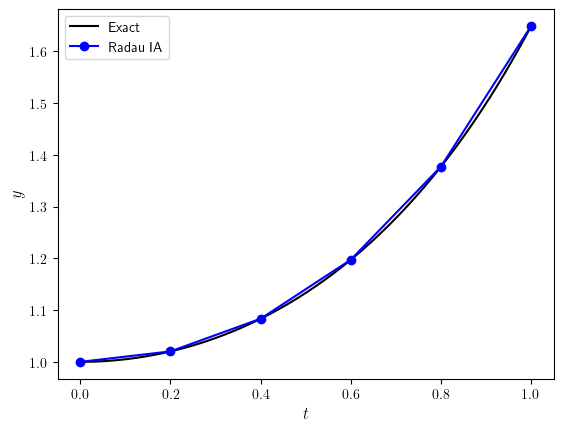

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True  # allows use of LaTeX in labels


def solveIVP(f, tspan, y0, h, solver):

    # Initialise t and y arrays
    t = np.arange(tspan[0], tspan[1] + h, h)
    y = np.zeros((len(t),len(y0)))
    t[0] = tspan[0]
    y[0,:] = y0

    # Loop through steps and calculate single step solver solution
    for n in range(len(t) - 1):
        y[n+1,:] = solver(f, t[n], y[n,:], h)
              
    return t, y


def radauIA(f, t, y, h): 

    # Calculate stage values
    Y1, Y2 = np.ones(len(y0)), np.ones(len(y0))
    Y1old, Y2old = np.ones(len(y0)), np.ones(len(y0))
    for k in range(10):
        Y1 = y + h * (1/4 * f(t, Y1) - 1/4 * f(t + 2/3 * h, Y2))
        Y2 = y + h * (1/4 * f(t, Y1) + 5/12 * f(t + 2/3 * h, Y2))

        if max(np.amax(abs(Y1 - Y1old)), np.amax(abs(Y2 - Y2old))) < 1e-4:
            break

        Y1old, Y2old = Y1, Y2

    return y + h / 4 * (f(t, Y1) + 3 * f(t + 2/3 * h,Y2))

 
 # Define ODE function
def f(t, y):
    return t * y


def exact(t):
    return np.exp(t ** 2 / 2)


# Define IVP
tspan = [0, 1]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.2         # step length
tol = 1e-4      # convergence tolerance

# Solve IVP using the IRK method
t, y = solveIVP(f, tspan, y0, h, radauIA)

# Plot solutions
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)
fig, ax = plt.subplots()
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t, y, "bo-", label="Radau IA")
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.legend()
plt.show()

from myst_nb import glue
glue("irk_example_1_plot", fig, display=False)